# Lab 1

In [ ]:
! pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [21]:
import nltk
nltk.download('wordnet')       # for WordNetLemmatizer
nltk.download('omw-1.4')       # optional, for extra languages


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\himan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\himan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [22]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from nltk.stem import PorterStemmer, WordNetLemmatizer

## lab 2

In [23]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\himan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('WordNetLemmatizer')
nltk.download('PorterStemmer')
nltk.download('WordListCorpusReader')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\himan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\himan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading WordNetLemmatizer: Package
[nltk_data]     'WordNetLemmatizer' not found in index
[nltk_data] Error loading PorterStemmer: Package 'PorterStemmer' not
[nltk_data]     found in index
[nltk_data] Error loading WordListCorpusReader: Package
[nltk_data]     'WordListCorpusReader' not found in index


False

In [25]:
from collections import Counter
text='Apple is looking at buying a U.K. startup for $1 billion in London.'


text = 'Apple is looking at buying a U.K. startup for $1 billion in London.'

stop_words = set(stopwords.words("english"))
tokens = word_tokenize(text.lower())

filtered = [w for w in tokens if w.isalpha() and w not in stop_words]
freq = Counter(filtered)

print(freq.most_common(5))

[('apple', 1), ('looking', 1), ('buying', 1), ('startup', 1), ('billion', 1)]


In [26]:
# for stemming
from nltk.stem import PorterStemmer

porter_stemmer=PorterStemmer()
words=['progammer', 'program','programs','progamming']
stemming_words=[porter_stemmer.stem(word) for word in words]
print(words)
print(stemming_words)

['progammer', 'program', 'programs', 'progamming']
['progamm', 'program', 'program', 'progam']


In [27]:
d1='Today is Thursday.'
d2='I am in Indore'
d3='Potato is a mutual friend of every vegitable'

list_of_token=word_tokenize(d1+d2+d3)
stemming_words=[porter_stemmer.stem(word) for word in list_of_token]

### CountVectorizer

In [ ]:
! pip install "numpy<2"


Note: you may need to restart the kernel to use updated packages.


In [29]:
import numpy as np
import nltk
print(np.__version__)


1.26.4


In [30]:
from sklearn.feature_extraction.text import CountVectorizer

text = ['I live in Indore']
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(text)


print("Vocabulary:", vectorizer.vocabulary_)


Vocabulary: {'live': 2, 'in': 0, 'indore': 1}


### Lemmatizer

In [31]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\himan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


In [33]:
sentence='i live in Indore Potato is a mutual friend of every vegitable'
lemmatizer = WordNetLemmatizer()
tokens = word_tokenize(sentence.lower())


lemmas = [lemmatizer.lemmatize(token) for token in tokens]

print("Original Tokens:", tokens)
print(lemmas)

Original Tokens: ['i', 'live', 'in', 'indore', 'potato', 'is', 'a', 'mutual', 'friend', 'of', 'every', 'vegitable']
['i', 'live', 'in', 'indore', 'potato', 'is', 'a', 'mutual', 'friend', 'of', 'every', 'vegitable']


### Tf-Idf Vector

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from joblib import dump, load
import pickle

In [35]:
documents = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?"
]

In [36]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(documents)

In [37]:
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

In [38]:
with open('tfidf_vectorizer.pkl', 'rb') as file:
    loaded_vectorizer_pickle = pickle.load(file)

In [39]:
dump(vectorizer, 'tfidf_vectorizer.joblib')

['tfidf_vectorizer.joblib']

In [40]:
loaded_vectorizer_joblib = load('tfidf_vectorizer.joblib')

In [41]:
new_documents = [
    "This is a new document.",
    "This document is different from the others."
]

In [42]:
X_new_pickle = loaded_vectorizer_pickle.transform(new_documents)

In [43]:
X_new_joblib = loaded_vectorizer_joblib.transform(new_documents)

In [44]:
print("Feature names:")
print(vectorizer.get_feature_names_out())

print("\nOriginal transformed data:")
print(X.toarray())

print("\nTransformed new data using loaded vectorizer from pickle:")
print(X_new_pickle.toarray())

print("\nTransformed new data using loaded vectorizer from joblib:")
print(X_new_joblib.toarray())

Feature names:
['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']

Original transformed data:
[[0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]
 [0.         0.6876236  0.         0.28108867 0.         0.53864762
  0.28108867 0.         0.28108867]
 [0.51184851 0.         0.         0.26710379 0.51184851 0.
  0.26710379 0.51184851 0.26710379]
 [0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]]

Transformed new data using loaded vectorizer from pickle:
[[0.         0.65416415 0.         0.53482206 0.         0.
  0.         0.         0.53482206]
 [0.         0.57684669 0.         0.47160997 0.         0.
  0.47160997 0.         0.47160997]]

Transformed new data using loaded vectorizer from joblib:
[[0.         0.65416415 0.         0.53482206 0.         0.
  0.         0.         0.53482206]
 [0.         0.57684669 0.         0.47160997 0.         0.
  0.47160997 0.         0.471

### Ngram

In [45]:
import nltk
from nltk.util import ngrams
from collections import Counter

text = "This is a sample sentence to demonstrate N-grams in NLP."
tokens = nltk.word_tokenize(text.lower())

unigrams = list(ngrams(tokens, 1))
print("Unigrams:", unigrams)

bigrams = list(ngrams(tokens, 2))
print("Bigrams:", bigrams)

trigrams = list(ngrams(tokens, 3))
print("Trigrams:", trigrams)

bigram_counts = Counter(bigrams)
print("\nBigram Counts:", bigram_counts.most_common(5))


Unigrams: [('this',), ('is',), ('a',), ('sample',), ('sentence',), ('to',), ('demonstrate',), ('n-grams',), ('in',), ('nlp',), ('.',)]
Bigrams: [('this', 'is'), ('is', 'a'), ('a', 'sample'), ('sample', 'sentence'), ('sentence', 'to'), ('to', 'demonstrate'), ('demonstrate', 'n-grams'), ('n-grams', 'in'), ('in', 'nlp'), ('nlp', '.')]
Trigrams: [('this', 'is', 'a'), ('is', 'a', 'sample'), ('a', 'sample', 'sentence'), ('sample', 'sentence', 'to'), ('sentence', 'to', 'demonstrate'), ('to', 'demonstrate', 'n-grams'), ('demonstrate', 'n-grams', 'in'), ('n-grams', 'in', 'nlp'), ('in', 'nlp', '.')]

Bigram Counts: [(('this', 'is'), 1), (('is', 'a'), 1), (('a', 'sample'), 1), (('sample', 'sentence'), 1), (('sentence', 'to'), 1)]


### Bow

In [46]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer

# Sample corpus
documents = [
    "This is a sample sentence",
    "This sentence is another example",
    "NLP is fun and powerful"
]

# Create the Bag of Words model
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)

# Feature names (unique words)
print("Vocabulary:", vectorizer.get_feature_names_out())

# Bag of Words matrix
print("BoW Matrix:\n", X.toarray())


Vocabulary: ['and' 'another' 'example' 'fun' 'is' 'nlp' 'powerful' 'sample' 'sentence'
 'this']
BoW Matrix:
 [[0 0 0 0 1 0 0 1 1 1]
 [0 1 1 0 1 0 0 0 1 1]
 [1 0 0 1 1 1 1 0 0 0]]


### One hot encoding

In [47]:
import nltk
from sklearn.preprocessing import LabelBinarizer

# Sample text
sentence = "NLP is fun"
tokens = nltk.word_tokenize(sentence.lower())

# One-hot encoding
encoder = LabelBinarizer()
one_hot = encoder.fit_transform(tokens)

print("Vocabulary:", encoder.classes_)
print("One Hot Encoding:\n", one_hot)


Vocabulary: ['fun' 'is' 'nlp']
One Hot Encoding:
 [[0 0 1]
 [0 1 0]
 [1 0 0]]


In [48]:
new_documents = [
    "This is a new document.",
    "This document is different from the others."
]
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)
with open('tfidf_vectorizer.pkl', 'rb') as file:
    loaded_vectorizer_pickle = pickle.load(file)
dump(vectorizer, 'tfidf_vectorizer.joblib')
loaded_vectorizer_joblib = load('tfidf_vectorizer.joblib')
new_documents = [
    "This is a new document.",
    "This document is different from the others."
]
X_new_pickle = loaded_vectorizer_pickle.transform(new_documents)
X_new_joblib = loaded_vectorizer_joblib.transform(new_documents)
print("Feature names:")
print(vectorizer.get_feature_names_out())

print("\nOriginal transformed data:")
print(X.toarray())

print("\nTransformed new data using loaded vectorizer from pickle:")
print(X_new_pickle.toarray())

print("\nTransformed new data using loaded vectorizer from joblib:")
print(X_new_joblib.toarray())


Feature names:
['and' 'another' 'example' 'fun' 'is' 'nlp' 'powerful' 'sample' 'sentence'
 'this']

Original transformed data:
[[0 0 0 0 1 0 0 1 1 1]
 [0 1 1 0 1 0 0 0 1 1]
 [1 0 0 1 1 1 1 0 0 0]]

Transformed new data using loaded vectorizer from pickle:
[[0 0 0 0 1 0 0 0 0 1]
 [0 0 0 0 1 0 0 0 0 1]]

Transformed new data using loaded vectorizer from joblib:
[[0 0 0 0 1 0 0 0 0 1]
 [0 0 0 0 1 0 0 0 0 1]]


### Lab 3

In [49]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

In [50]:
np.random.seed(42)
embeddings1 = np.random.rand(100, 51)  # First set: 100 samples, 50-dim each
embeddings2 = np.random.rand(100, 51) + 1

In [51]:
combined_embeddings = np.vstack([embeddings1, embeddings2])


In [52]:
np.shape(combined_embeddings)

(200, 51)

In [53]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
embeddings_2d = tsne.fit_transform(combined_embeddings)


In [54]:
labels = np.array([0] * len(embeddings1) + [1] * len(embeddings2))

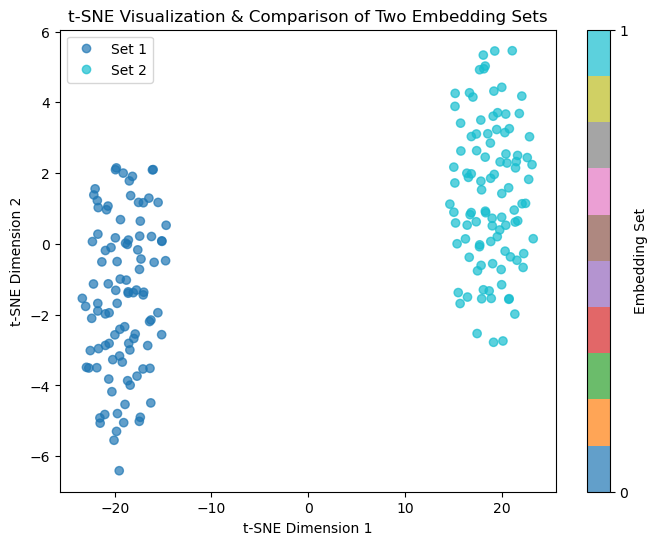

In [55]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    embeddings_2d[:, 0],
    embeddings_2d[:, 1],
    c=labels,
    cmap='tab10',
    alpha=0.7,
    label='Embeddings'
)
plt.legend(handles=scatter.legend_elements()[0], labels=['Set 1', 'Set 2'])
plt.title('t-SNE Visualization & Comparison of Two Embedding Sets')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(scatter, ticks=[0, 1], label='Embedding Set')
plt.show()


In [ ]:
! pip install sentence-transformers


^C
Note: you may need to restart the kernel to use updated packages.


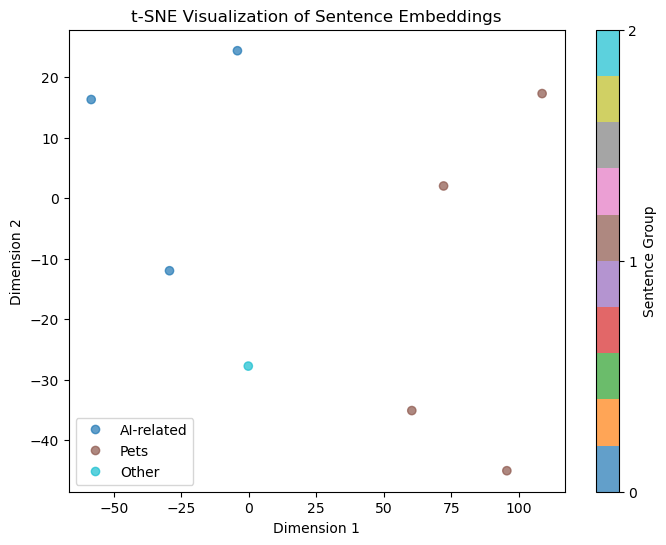

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load a pre-trained sentence transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')  # Fast & popular model

# Step 2: Sample sentences for embedding
sentences = [
    "I love machine learning.",
    "The cat sat on the mat.",
    "Artificial intelligence is fascinating.",
    "Dogs are great pets.",
    "Deep learning transforms many fields.",
    "My dog loves playing fetch.",
    "Natural language processing is useful.",
    "Cats are very curious animals."
]

# Step 3: Generate embeddings
embeddings = model.encode(sentences)

# Optional: For demonstration, let's create labels (cats vs dogs vs AI)
labels = [0, 1, 2, 1, 0, 1, 0, 1]  # Just an example grouping

# Step 4: Apply t-SNE
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

# Step 5: Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    embeddings_2d[:, 0],
    embeddings_2d[:, 1],
    c=labels,
    cmap='tab10',
    alpha=0.7
)
plt.legend(handles=scatter.legend_elements()[0], labels=['AI-related', 'Pets', 'Other'])
plt.title('t-SNE Visualization of Sentence Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(scatter, ticks=[0, 1, 2], label='Sentence Group')
plt.show()


In [ ]:
# Import libraries
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import nltk

In [ ]:
# Download required NLTK data (only first time)
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\himan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\himan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\himan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Sample paragraphs
text1 = """Natural language processing (NLP) is a field of artificial intelligence 
that focuses on the interaction between computers and human language. 
It involves tasks like parsing, tokenization, and semantic understanding."""

text2 = """I recently bought this pair of headphones. The sound quality is excellent 
and the battery life lasts for hours, but the ear pads became uncomfortable after long listening sessions."""


In [ ]:
# Combine texts
texts = [text1, text2]

In [ ]:
# Initialize tools
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [ ]:
# Step-by-step cleaning
for i, text in enumerate(texts, start=1):
    print(f"\n========================")
    print(f"Paragraph {i}")
    print("========================")
    print(text)

    # 1️⃣ Tokenization
    tokens = re.findall(r"[A-Za-z]+(?:'[A-Za-z]+)?", text)
    print("\n1. Tokens:\n", tokens)
    
    # 2️⃣ Lowercasing
    lower_tokens = [t.lower() for t in tokens]
    print("\n2. Lowercased:\n", lower_tokens)

    # 3️⃣ Stopword Removal
    filtered_tokens = [t for t in lower_tokens if t not in stop_words]
    print("\n3. After Stopword Removal:\n", filtered_tokens)

    # 4️⃣ Stemming
    stemmed_tokens = [ps.stem(t) for t in filtered_tokens]
    print("\n4. After Stemming:\n", stemmed_tokens)

    # 5️⃣ Lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(t) for t in filtered_tokens]
    print("\n5. After Lemmatization:\n", lemmatized_tokens)



Paragraph 1
Natural language processing (NLP) is a field of artificial intelligence 
that focuses on the interaction between computers and human language. 
It involves tasks like parsing, tokenization, and semantic understanding.

1. Tokens:
 ['Natural', 'language', 'processing', 'NLP', 'is', 'a', 'field', 'of', 'artificial', 'intelligence', 'that', 'focuses', 'on', 'the', 'interaction', 'between', 'computers', 'and', 'human', 'language', 'It', 'involves', 'tasks', 'like', 'parsing', 'tokenization', 'and', 'semantic', 'understanding']

2. Lowercased:
 ['natural', 'language', 'processing', 'nlp', 'is', 'a', 'field', 'of', 'artificial', 'intelligence', 'that', 'focuses', 'on', 'the', 'interaction', 'between', 'computers', 'and', 'human', 'language', 'it', 'involves', 'tasks', 'like', 'parsing', 'tokenization', 'and', 'semantic', 'understanding']

3. After Stopword Removal:
 ['natural', 'language', 'processing', 'nlp', 'field', 'artificial', 'intelligence', 'focuses', 'interaction', 'com

## date:-[3/12/25]

In [2]:

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('IMDB-Dataset - IMDB-Dataset.csv')

In [4]:
print(df)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


In [5]:
x=df["review"].astype(str)
y=df["sentiment"].map({'positive':1,'negative':0})

In [6]:
print(y)

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64


In [7]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

In [8]:
print(x_test.size)
print(x_train.size)

10000
40000


In [9]:
vectorizer=TfidfVectorizer(max_features=5000)

In [10]:
x_train_vec=vectorizer.fit_transform(x_train)

In [11]:
x_test_vec=vectorizer.transform(x_test)

In [12]:
model=MultinomialNB()
model.fit(x_train_vec,y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [14]:
model.predict(x_test_vec)

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [15]:
result=model.predict(x_test_vec)

In [16]:

from sklearn.metrics import classification_report

print(classification_report(y_test,result))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      5060
           1       0.85      0.86      0.85      4940

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [17]:
model2 = LogisticRegression()
model2.fit(x_train_vec,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [18]:
model2.predict(x_test_vec)
result2=model2.predict(x_test_vec)

In [19]:

from sklearn.metrics import classification_report

print(classification_report(y_test,result2))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      5060
           1       0.88      0.90      0.89      4940

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
!pip install tensorflow



  Using cached tensorflow-2.20.0-cp312-cp312-win_amd64.whl.metadata (4.6 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.9.23-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.2.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached grpcio-1.76.0-cp312-cp312-win_amd64.whl.metadata (3.8 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.12.0-py3-none-any.whl.metadata (5.9 kB)
  Using cached ml_dtypes-0.5.3-cp312-cp312-win_amd64.whl.metadata (9.2 kB)
  Using cached namex-0.1.0-py3-none-any.whl.metadata (322 bytes)
  Using cached optree-0.

ERROR: THESE PACKAGES DO NOT MATCH THE HASHES FROM THE REQUIREMENTS FILE. If you have updated the package versions, please update the hashes. Otherwise, examine the package contents carefully; someone may have tampered with them.
    unknown package:
        Expected sha256 1590cbf87b6bcbd34d8e9ad70d0c696135e0aa71be31803b27358cf7ed63f8fc
             Got        7ccefee7d2677c539830f81dba1840000950876e3217fdd1678b1efaa9a010a2




    --------------------------------------- 5.5/331.9 MB 173.2 kB/s eta 0:31:25
    --------------------------------------- 5.5/331.9 MB 172.7 kB/s eta 0:31:30
    --------------------------------------- 5.5/331.9 MB 172.7 kB/s eta 0:31:30
    --------------------------------------- 5.5/331.9 MB 172.7 kB/s eta 0:31:30
    --------------------------------------- 5.5/331.9 MB 172.7 kB/s eta 0:31:30
    --------------------------------------- 5.5/331.9 MB 172.7 kB/s eta 0:31:30
    --------------------------------------- 5.5/331.9 MB 172.7 kB/s eta 0:31:30
    --------------------------------------- 5.5/331.9 MB 172.7 kB/s eta 0:31:30
    --------------------------------------- 5.5/331.9 MB 172.7 kB/s eta 0:31:30
    --------------------------------------- 5.5/331.9 MB 172.7 kB/s eta 0:31:30
    --------------------------------------- 5.5/331.9 MB 172.7 kB/s eta 0:31:30
    --------------------------------------- 5.5/331.9 MB 172.7 kB/s eta 0:31:30
    -----------------------------------

   --- ----------------------------------- 27.0/331.9 MB 370.1 kB/s eta 0:13:44
   --- ----------------------------------- 27.0/331.9 MB 369.9 kB/s eta 0:13:45
   --- ----------------------------------- 27.0/331.9 MB 369.5 kB/s eta 0:13:46
   --- ----------------------------------- 27.1/331.9 MB 368.6 kB/s eta 0:13:47
   --- ----------------------------------- 27.1/331.9 MB 368.6 kB/s eta 0:13:47
   --- ----------------------------------- 27.1/331.9 MB 367.6 kB/s eta 0:13:50
   --- ----------------------------------- 27.1/331.9 MB 367.0 kB/s eta 0:13:51
   --- ----------------------------------- 27.1/331.9 MB 366.4 kB/s eta 0:13:52
   --- ----------------------------------- 27.1/331.9 MB 365.8 kB/s eta 0:13:54
   --- ----------------------------------- 27.1/331.9 MB 365.8 kB/s eta 0:13:54
   --- ----------------------------------- 27.1/331.9 MB 365.8 kB/s eta 0:13:54
   --- ----------------------------------- 27.2/331.9 MB 364.1 kB/s eta 0:13:57
   --- ---------------------------------

In [8]:
import tensorflow as tf

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv(r"C:\Users\himan\Documents\01-Code\NLP\NLP\IMDB-Dataset - IMDB-Dataset.csv")
df.columns = ['review','sentiment']
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['review'])
X= tokenizer.texts_to_sequences(df['review'])
X = pad_sequences(X,maxlen=200)

In [4]:
y= np.where(df['sentiment']=='positive',1,0)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:

model = Sequential([
    Embedding(1000, 128, input_length=200),
    LSTM(16, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train, y_train, validation_split=0.2, epochs=2, batch_size=64)